In [32]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import matplotlib.pyplot as plt

In [33]:
data_dir= r'E:\Projects\Student Acedemics Predictor\Dataset'  #locating the data

if os.path.exists(data_dir):
    print("Directory exists:", data_dir)
    print("Subfolders:", os.listdir(data_dir))
else:
    print("Error: Dataset directory does not exist!")

Directory exists: E:\Projects\Student Acedemics Predictor\Dataset
Subfolders: ['Student_Performance.csv']


In [34]:
csv_path= os.path.join(data_dir,'Student_Performance.csv')  #importing the data
df= pd.read_csv(csv_path)

df.head #to preview the dataset

<bound method NDFrame.head of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sam

In [35]:
#Broken Values

df.info()
df.isnull().sum()
df.duplicated().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [36]:
df['ExtracExtracurricular Activities']= df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

features_to_scale= ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
scaler= StandardScaler()
df[features_to_scale]= scaler.fit_transform(df[features_to_scale])

df.to_csv('student_cleaned.csv', index=False)

df[features_to_scale].describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.048051e-16,-1.296740e-16,1.648459e-16,-1.293188e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.542149e+00,-1.697914e+00,-1.492294e+00,-1.598526e+00
25%,-7.697033e-01,-8.906381e-01,-9.025945e-01,-9.009822e-01
50%,2.742182e-03,-2.570019e-02,2.768051e-01,1.453332e-01
75%,7.751877e-01,8.969003e-01,8.665048e-01,8.428768e-01
max,1.547633e+00,1.704176e+00,1.456205e+00,1.540420e+00


In [37]:
# Define input and target
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Map the categorical column BEFORE splitting
X['Extracurricular Activities'] = X['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Data Splitting (80% Training and 20% Test) with random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dtypes
print(X_train.dtypes)


Hours Studied                       float64
Previous Scores                     float64
Extracurricular Activities            int64
Sleep Hours                         float64
Sample Question Papers Practiced    float64
ExtracExtracurricular Activities      int64
dtype: object


In [38]:
#initialize and learn

model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred= model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 4.082628398521851
R^2 Score: 0.9889832909573145


In [40]:
joblib.dump(model, 'student_performance_model.pkl')

['student_performance_model.pkl']

In [41]:
y_pred= model.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse= mse ** 0.5
mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.6111213463123035
Mean Squared Error: 4.082628398521851
Root Mean Squared Error: 2.020551508505005
R^2 Score: 0.9889832909573145


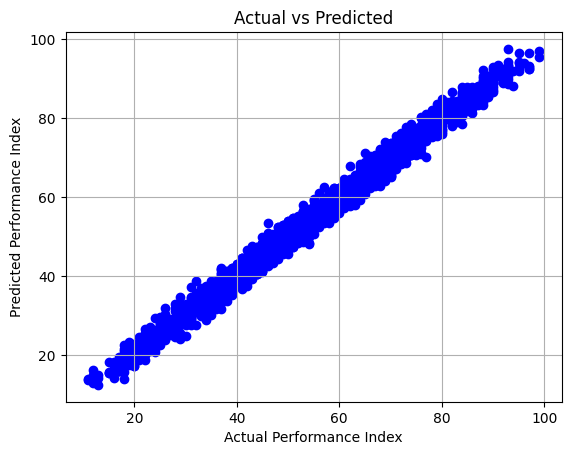

In [42]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()